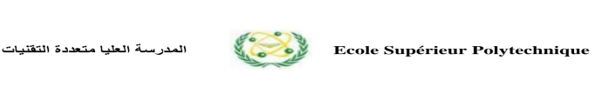

In [1]:
import pandas as pd
df = pd.read_csv('file_names_mapping (2).csv')
print(df.head())

                 New File Names  Age Gender
0    audio_001_audio_001_17.m4a   17      M
1  audio_002_audio_001_19-f.m4a   19      F
2  audio_003_audio_001_20-F.m4a   20      F
3  audio_004_audio_002_19-F.m4a   19      F
4  audio_005_audio_002_20-f.m4a   20      F


In [60]:
len(df)

315

In [2]:

df['Age'] = df['Age'].replace('Unknown', 0)

df['Age'] = df['Age'].astype(int)

def age_to_group(age):
    if 13 <= age <= 19:
        return 'teens'
    elif 20 <= age <= 29:
        return 'twenties'
    elif 30 <= age <= 39:
        return 'thirties'
    elif 40 <= age <= 49:
        return 'forties'
    elif 50 <= age <= 59:
        return 'fifties'
    elif 60 <= age <= 69:
        return 'sixties'
    elif 70 <= age <= 79:
        return 'seventies'
    elif 80 <= age <= 89:
        return 'eighties'
    else:
        return 'unknown'

df['Age Group'] = df['Age'].apply(age_to_group)

print(df.head())

                 New File Names  Age Gender Age Group
0    audio_001_audio_001_17.m4a   17      M     teens
1  audio_002_audio_001_19-f.m4a   19      F     teens
2  audio_003_audio_001_20-F.m4a   20      F  twenties
3  audio_004_audio_002_19-F.m4a   19      F     teens
4  audio_005_audio_002_20-f.m4a   20      F  twenties


In [3]:
def map_gender(gender):
    if gender.upper() == 'M':
        return 'male'
    elif gender.upper() == 'F' or gender.lower() == 'f':
        return 'female'
    else:
        return 'unknown'
df['Gender'] = df['Gender'].apply(map_gender)
print(df)

                   New File Names  Age  Gender Age Group
0      audio_001_audio_001_17.m4a   17    male     teens
1    audio_002_audio_001_19-f.m4a   19  female     teens
2    audio_003_audio_001_20-F.m4a   20  female  twenties
3    audio_004_audio_002_19-F.m4a   19  female     teens
4    audio_005_audio_002_20-f.m4a   20  female  twenties
..                            ...  ...     ...       ...
310    audio_311_audio_180_49.m4a   49    male   forties
311  audio_312_audio_181_50_2.m4a   50    male   fifties
312  audio_313_audio_182_50-f.m4a   50  female   fifties
313    audio_314_audio_183_50.m4a   50    male   fifties
314    audio_315_audio_184_52.m4a   52    male   fifties

[315 rows x 4 columns]


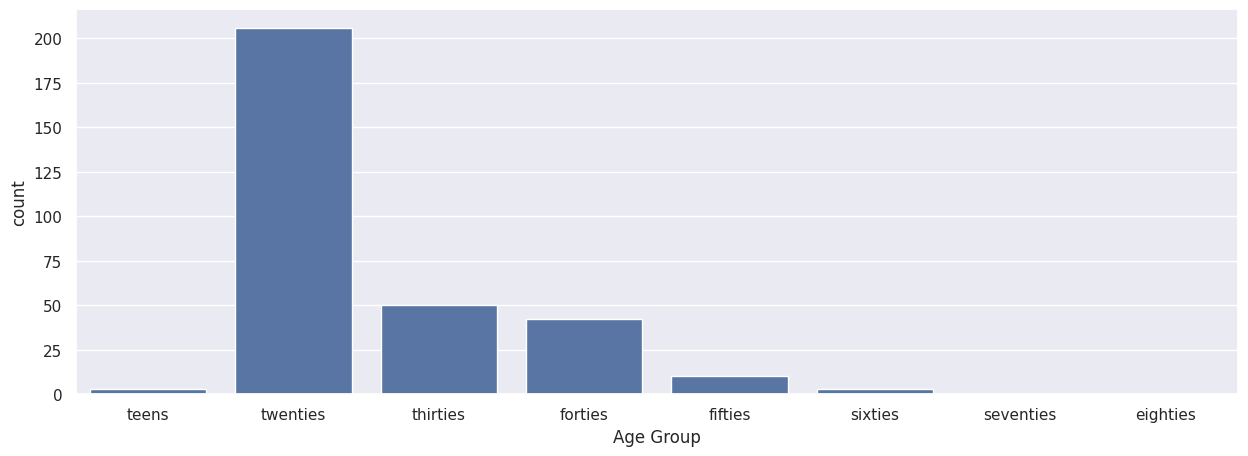

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="Age Group",
              data=df[df['Age'].notna()],
              order=['teens', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

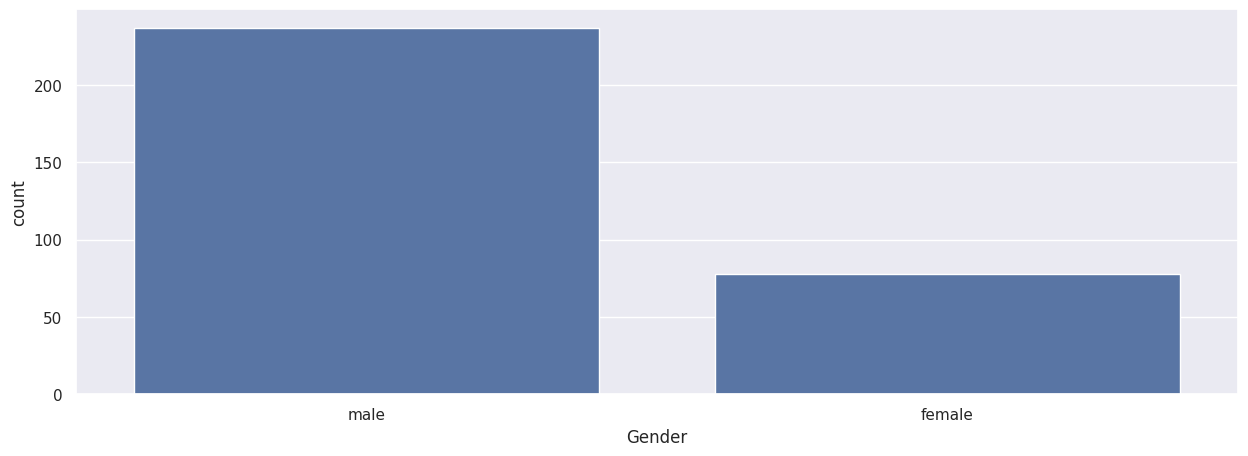

In [59]:
sns.set(rc={'figure.figsize':(15, 5)})

# Création du graphique countplot pour les genres
sns.countplot(x="Gender", data=df[df['Gender'].notna()])

# Affichage du graphique
plt.show()

In [5]:
import pandas as pd
import numpy as np
import librosa
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
ds_path = "/content/drive/MyDrive/Vocal/"

In [7]:
def feature_extraction(file_name):
    audio_data, sampling_rate = librosa.load(ds_path + file_name)
    features = []
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate))
    features.extend([spectral_centroid, spectral_bandwidth, spectral_rolloff])

    mfcc = librosa.feature.mfcc(y=audio_data, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))

    return features



In [8]:
# Create features dataframe
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig) - 1
    stop_counter = 30000

    for idx, row in orig.iterrows():
        if idx >= stop_counter:
            break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['New File Names'])
        features.append(row['Age Group'])
        features.append(row['Gender'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                           "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                           "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                           "mfcc17", "mfcc18", "mfcc19", "mfcc20", "age_group", "gender"])

df_features = create_df_features(df)
print(df_features.head())

0/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


2/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


3/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


5/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


6/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


7/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


8/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


9/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


10/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


11/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


12/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


13/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


15/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


16/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


18/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


19/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


21/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


23/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


24/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


26/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


27/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


28/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


29/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


30/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


31/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


34/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


35/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


36/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


38/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


39/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


40/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


42/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


43/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


44/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


45/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


47/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


48/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


50/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


51/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


52/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


53/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


55/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


56/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


58/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


59/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


61/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


62/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


64/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


66/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


67/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


68/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


69/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


70/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


71/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


72/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


73/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


75/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


76/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


77/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


78/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


80/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


81/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


83/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


84/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


86/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


87/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


88/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


89/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


90/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


91/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


92/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


93/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


94/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


95/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


96/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


98/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


100/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


101/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


102/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


103/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


104/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


106/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


107/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


108/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


109/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


110/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


112/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


113/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


115/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


116/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


118/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


119/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


120/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


121/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


122/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


123/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


124/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


125/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


126/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


127/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


128/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


129/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


131/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


133/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


134/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


135/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


137/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


138/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


140/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


142/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


143/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


145/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


146/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


147/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


148/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


149/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


151/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


152/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


154/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


155/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


157/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


159/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


160/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


162/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


163/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


165/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


166/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


167/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


168/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


169/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


171/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


173/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


175/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


177/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


179/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


181/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


183/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


185/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


186/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


187/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


188/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


189/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


191/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


193/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


194/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


195/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


197/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


199/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


201/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


203/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


205/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


206/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


207/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


208/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


209/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


210/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


212/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


213/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


214/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


215/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


216/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


217/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


218/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


219/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


220/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


221/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


222/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


223/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


224/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


225/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


226/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


227/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


229/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


230/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


231/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


233/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


234/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


235/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


236/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


237/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


238/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


239/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


240/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


241/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


242/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


243/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


244/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


246/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


247/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


248/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


249/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


250/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


251/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


252/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


253/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


255/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


256/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


257/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


258/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


259/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


260/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


261/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


262/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


263/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


264/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


265/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


266/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


267/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


268/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


269/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


270/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


271/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


272/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


273/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


274/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


276/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


278/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


279/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


280/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


281/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


282/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


283/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


284/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


285/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


287/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


288/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


289/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


290/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


291/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


292/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


293/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


294/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


295/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


296/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


297/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


298/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


300/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


301/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


303/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


304/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


305/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


306/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


307/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


308/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


309/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


310/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


311/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


312/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


313/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


314/314

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


   spectral_centroid  spectral_bandwidth  spectral_rolloff       mfcc1  \
0        2532.075537         2191.112369       4781.409497 -378.104065   
1        2810.488644         2443.154676       5344.915506 -245.816437   
2        2106.084226         2013.212584       4122.449818 -248.922684   
3        2635.636076         2281.183267       5314.471436 -282.934021   
4        2517.903195         2595.147349       5359.524536 -292.128326   

        mfcc2      mfcc3      mfcc4      mfcc5      mfcc6      mfcc7  ...  \
0   89.598358   8.103363  10.900118 -28.568573 -12.853934 -17.579878  ...   
1   85.039223  -2.533883  33.693718  16.436169  -2.257865  -0.151808  ...   
2  107.630104 -38.829212   0.980968 -35.504547   3.449733 -19.970936  ...   
3   89.628326 -15.640484  -0.620850 -46.550224  15.972294 -38.182774  ...   
4   95.281837  13.609916  19.470577   6.231575   6.650413  -0.959258  ...   

     mfcc13     mfcc14    mfcc15    mfcc16     mfcc17     mfcc18    mfcc19  \
0  2.290672 -1

<ipython-input-7-2facf902b2c2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(ds_path + file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [9]:
from sklearn.preprocessing import StandardScaler

def scale_features(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(df.iloc[:, 0:-2], dtype = float))

    return scaled_data, scaler

x, scaler = scale_features(df_features)
print("Before scaling:", df_features.iloc[0].values[:-2])
print("\nAfter scaling:", x[0])

Before scaling: [2532.075537038706 2191.1123694537678 4781.409496946383 -378.10406
 89.59836 8.103363 10.900118 -28.568573 -12.853934 -17.579878 -6.3580184
 -19.267717 2.2753031 -21.121233 0.2764847 2.2906723 -10.508153 0.56110233
 -0.3017843 -10.011483 1.6999391 -5.1620946 -7.6350174]

After scaling: [ 0.40642873 -0.21731274  0.12961183 -2.04836689 -0.47193363  0.78244562
 -0.41121986 -0.78241809 -1.3391484  -0.25725495 -0.29650643 -0.32690739
 -0.18091124 -1.39333514 -0.02868171  1.11344557 -1.32419275  0.61166342
  0.17464601 -0.79613106  0.54112686 -0.34884657 -0.7903972 ]


In [10]:
# Encode labels
def get_labels(df1):
    age_labels = df1['age_group']
    gender_labels = df1['gender']

    age_encoder = LabelEncoder()
    gender_encoder = LabelEncoder()

    age_labels = age_encoder.fit_transform(age_labels)
    gender_labels = gender_encoder.fit_transform(gender_labels)

    return age_labels, gender_labels, age_encoder, gender_encoder

y_age, y_gender, age_encoder, gender_encoder = get_labels(df_features)
print("Age classes:", age_encoder.classes_)
print("Gender classes:", gender_encoder.classes_)

Age classes: ['fifties' 'forties' 'sixties' 'teens' 'thirties' 'twenties' 'unknown']
Gender classes: ['female' 'male']


In [11]:
y_age = to_categorical(y_age, num_classes=len(age_encoder.classes_))
y_gender = to_categorical(y_gender, num_classes=len(gender_encoder.classes_))


In [12]:
# Prepare data for LSTM model
x = x.reshape(x.shape[0], x.shape[1], 1)

x_train, x_test, y_train_age, y_test_age, y_train_gender, y_test_gender = train_test_split(x, y_age, y_gender, test_size=0.2, random_state=42)



In [13]:
# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

In [14]:
# Age group prediction output
output_age = Dense(len(age_encoder.classes_), activation='softmax', name='age_output')(model.layers[-1].output)

# Gender prediction output
output_gender = Dense(len(gender_encoder.classes_), activation='softmax', name='gender_output')(model.layers[-1].output)


In [15]:
from tensorflow.keras.models import Model

model = Model(inputs=model.input, outputs=[output_age, output_gender])

model.compile(loss={'age_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 lstm_input (InputLayer)     [(None, 23, 1)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 23, 128)              66560     ['lstm_input[0][0]']          
                                                                                                  
 dropout (Dropout)           (None, 23, 128)              0         ['lstm[0][0]']                
                                                                                                  
 lstm_1 (LSTM)               (None, 64)                   49408     ['dropout[0][0]']             
                                                                                              

In [16]:
# Train the model
history = model.fit(x_train,
                    {'age_output': y_train_age, 'gender_output': y_train_gender},
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_test, {'age_output': y_test_age, 'gender_output': y_test_gender}))


Epoch 1/50
8/8 [==============================] - 7s 195ms/step - loss: 2.5731 - age_output_loss: 1.9025 - gender_output_loss: 0.6705 - age_output_accuracy: 0.3810 - gender_output_accuracy: 0.6627 - val_loss: 2.4869 - val_age_output_loss: 1.8590 - val_gender_output_loss: 0.6278 - val_age_output_accuracy: 0.6349 - val_gender_output_accuracy: 0.7778
Epoch 2/50
8/8 [==============================] - 0s 45ms/step - loss: 2.3201 - age_output_loss: 1.7213 - gender_output_loss: 0.5988 - age_output_accuracy: 0.5317 - gender_output_accuracy: 0.7579 - val_loss: 2.1009 - val_age_output_loss: 1.5569 - val_gender_output_loss: 0.5440 - val_age_output_accuracy: 0.6667 - val_gender_output_accuracy: 0.7937
Epoch 3/50
8/8 [==============================] - 0s 52ms/step - loss: 1.8939 - age_output_loss: 1.2787 - gender_output_loss: 0.6152 - age_output_accuracy: 0.6151 - gender_output_accuracy: 0.7421 - val_loss: 1.6572 - val_age_output_loss: 1.1370 - val_gender_output_loss: 0.5202 - val_age_output_accura

In [17]:
# Train the model
history = model.fit(x_train,
                    {'age_output': y_train_age, 'gender_output': y_train_gender},
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_test, {'age_output': y_test_age, 'gender_output': y_test_gender}))


Epoch 1/50
8/8 [==============================] - 0s 57ms/step - loss: 1.3891 - age_output_loss: 0.8972 - gender_output_loss: 0.4919 - age_output_accuracy: 0.6865 - gender_output_accuracy: 0.7540 - val_loss: 1.5836 - val_age_output_loss: 1.1394 - val_gender_output_loss: 0.4442 - val_age_output_accuracy: 0.6667 - val_gender_output_accuracy: 0.7937
Epoch 2/50
8/8 [==============================] - 0s 50ms/step - loss: 1.3683 - age_output_loss: 0.8825 - gender_output_loss: 0.4858 - age_output_accuracy: 0.6825 - gender_output_accuracy: 0.7698 - val_loss: 1.6027 - val_age_output_loss: 1.1601 - val_gender_output_loss: 0.4426 - val_age_output_accuracy: 0.6825 - val_gender_output_accuracy: 0.7937
Epoch 3/50
8/8 [==============================] - 0s 51ms/step - loss: 1.4063 - age_output_loss: 0.9220 - gender_output_loss: 0.4843 - age_output_accuracy: 0.6865 - gender_output_accuracy: 0.7500 - val_loss: 1.6271 - val_age_output_loss: 1.2044 - val_gender_output_loss: 0.4227 - val_age_output_accurac

In [18]:
# Evaluate the model
results = model.evaluate(x_test, {'age_output': y_test_age, 'gender_output': y_test_gender})

# Extract the relevant metrics
loss = results[0]
age_loss = results[1]
gender_loss = results[2]
age_accuracy = results[3]
gender_accuracy = results[4]

print(f'Test Loss: {loss:.4f}')
print(f'Test Age Group Loss: {age_loss:.4f}')
print(f'Test Gender Loss: {gender_loss:.4f}')
print(f'Test Age Group Accuracy: {age_accuracy * 100:.2f}%')
print(f'Test Gender Accuracy: {gender_accuracy * 100:.2f}%')



2/2 [==============================] - 0s 20ms/step - loss: 1.6759 - age_output_loss: 1.2419 - gender_output_loss: 0.4340 - age_output_accuracy: 0.6667 - gender_output_accuracy: 0.7778
Test Loss: 1.6759
Test Age Group Loss: 1.2419
Test Gender Loss: 0.4340
Test Age Group Accuracy: 66.67%
Test Gender Accuracy: 77.78%


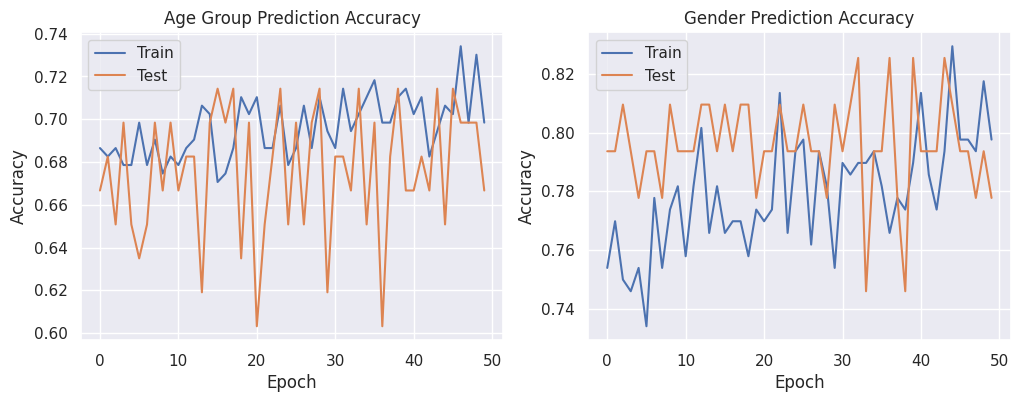

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['age_output_accuracy'])
plt.plot(history.history['val_age_output_accuracy'])
plt.title('Age Group Prediction Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Gender Prediction Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [20]:
import joblib
from tensorflow.keras.models import load_model

# Save the model
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Save the encoders
from tensorflow.keras.models import load_model
import joblib
from sklearn.preprocessing import LabelEncoder

import joblib

# Save the encoders
joblib.dump(age_encoder, "age_encoder.pkl")
joblib.dump(gender_encoder, "gender_encoder.pkl")


['gender_encoder.pkl']

In [28]:
import warnings
import pandas as pd
import numpy as np
import librosa
from tensorflow.keras.models import load_model
import joblib
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the saved model
loaded_model = load_model("my_model.h5")

# Load the encoders
age_encoder = joblib.load("age_encoder.pkl")
gender_encoder = joblib.load("gender_encoder.pkl")

# Define a function to extract features from a single audio file
def extract_features_from_audio(file_path):
    audio_data, sampling_rate = librosa.load(file_path)
    features = []
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate))
    features.extend([spectral_centroid, spectral_bandwidth, spectral_rolloff])

    mfcc = librosa.feature.mfcc(y=audio_data, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))

    return np.array(features)

# Define a function to map numeric predictions to original labels
def map_labels(age_prediction, gender_prediction, age_encoder, gender_encoder):
    age_label = age_encoder.inverse_transform([age_prediction])[0]
    gender_label = gender_encoder.inverse_transform([gender_prediction])[0]
    return age_label, gender_label

# Define a function to predict age group and gender from an audio file
def predict_age_gender(file_path, model, age_encoder, gender_encoder):
    # Extract features from the audio file
    features = extract_features_from_audio(file_path)
    # Reshape features for LSTM model input
    features = features.reshape(1, features.shape[0], 1)
    # Make predictions
    predictions = model.predict(features)
    age_prob, gender_prob = predictions[0], predictions[1]
    # Decode predictions
    age_prediction = np.argmax(age_prob)
    gender_prediction = np.argmax(gender_prob)
    # Map numeric predictions to original labels
    age_label, gender_label = map_labels(age_prediction, gender_prediction, age_encoder, gender_encoder)
    return age_label, gender_label




In [58]:
from IPython.display import display, Audio

file_paths = [
    "/content/drive/MyDrive/Vocal/Pred/dd.m4a",
    "/content/drive/MyDrive/Vocal/Pred/bekar.m4a",
    "/content/drive/MyDrive/Vocal/Pred/Zeynebou.m4a",
    "/content/drive/MyDrive/Vocal/Pred/24-voudel.m4a",
    "/content/drive/MyDrive/Vocal/Pred/da3iye.m4a"
]

for file_path in file_paths:
    try:
        display(Audio(file_path))
    except ValueError as e:
        print(f"Error playing file {file_path}: {e}")
        continue

    try:
        age_label, gender_label = predict_age_gender(file_path, loaded_model, age_encoder, gender_encoder)
        print(f"File: {file_path}")
        print(f"Predicted Age Group: {age_label}")
        print(f"Predicted Gender: {gender_label}\n")
    except Exception as e:
        print(f"Error predicting for file {file_path}: {e}")



1/1 [==============================] - 0s 34ms/step
File: /content/drive/MyDrive/Vocal/Pred/dd.m4a
Predicted Age Group: forties
Predicted Gender: male



1/1 [==============================] - 0s 40ms/step
File: /content/drive/MyDrive/Vocal/Pred/bekar.m4a
Predicted Age Group: thirties
Predicted Gender: male

Error playing file /content/drive/MyDrive/Vocal/Pred/Zeynebou.m4a: rate must be specified when data is a numpy array or list of audio samples.


1/1 [==============================] - 0s 33ms/step
File: /content/drive/MyDrive/Vocal/Pred/24-voudel.m4a
Predicted Age Group: twenties
Predicted Gender: female



1/1 [==============================] - 0s 36ms/step
File: /content/drive/MyDrive/Vocal/Pred/da3iye.m4a
Predicted Age Group: thirties
Predicted Gender: female

